# Linear Regression from Scratch using Gradient Descent

This project implements a Linear Regression model from scratch, using
Gradient Descent as the optimization algorithm. The goal is to understand
the mathematical foundations of linear regression and verify the correctness
of the implementation by comparing it with Scikit-Learn's `LinearRegression`.


## Libraries and Dependencies

The following libraries are used in this project:

- **NumPy** for numerical computations
- **Pandas** for data handling
- **Scikit-Learn** for data generation and model comparison
- **Matplotlib / Seaborn** for 2D and 3D visualizations

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Mathematical Formulation and Optimization Details

The Linear Regression model is defined by the hypothesis function:

$$
\hat{y} = Xw + b
$$

where:
- $X \in \mathbb{R}^{n \times d}$ is the feature matrix
- $w \in \mathbb{R}^{d}$ is the weight vector
- $b \in \mathbb{R}$ is the bias term
- $\hat{y} \in \mathbb{R}^{n}$ is the predicted output

---

### Cost Function

The optimization objective is to minimize the **Mean Squared Error (MSE)**:

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

This function measures the average squared difference between the true
targets $y$ and the model predictions $\hat{y}$.

---

### Gradient Descent Optimization

The model parameters are optimized using **Batch Gradient Descent**.
At each iteration, the gradients of the cost function with respect to
the parameters are computed analytically:

$$
\frac{\partial J}{\partial w} = \frac{2}{n} X^T (y - \hat{y})
$$

$$
\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

The parameters are then updated according to:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

---

### Hyperparameters and Training Dynamics

- **Learning Rate ($\alpha$)**  
  Controls the step size taken in the direction of the negative gradient.
  A small $\alpha$ leads to slow but stable convergence, while a large
  $\alpha$ may cause oscillations or divergence.

- **Epochs / Iterations**  
  Each epoch corresponds to one full update of the parameters using the
  entire dataset. The number of epochs determines how many optimization
  steps the algorithm performs.

- **Step Size**  
  The effective step taken at each iteration is given by the product of
  the learning rate and the gradient magnitude. As the model approaches
  a minimum, gradients become smaller, resulting in naturally smaller
  update steps.

- **Minimum Step / Convergence Criterion**  
  Training may be stopped when the change in the cost function or the
  parameter updates becomes smaller than a predefined threshold,
  indicating convergence to a (local) minimum.



In [45]:
class LinearRegression_GD:
    def __init__(self,lr=0.01,epochs=1000,min_step = 0.00001):
        self.lr=lr
        self.epochs =epochs
        self.w= None
        self.b = None
        self.min_step= min_step
        self.error_list=[]
    def fit(self,X,y):
        X = np.asarray(X)
        if X.ndim ==1:
            X=X.reshape(-1,1)
        y = np.asarray(y)
        n=X.shape[0]
        self.w = np.ones(X.shape[1])
        self.b = 0.0
        
        for p in range (self.epochs):
            y_ = X@ self.w + self.b
            self.error_list.append(np.mean((y_-y)**2))
            
            dw = (2/n) * X.T @ (y_ - y)
            db = (2/n) * np.sum(y_ - y)

            self.w -= self.lr*dw
            self.b -= self.lr*db

            if np.all(np.abs(self.lr*dw) <= self.min_step) and np.abs(self.lr*db) <= self.min_step:
                break
            else:
                continue
        
    def predict(self,X_pred):
        X_pred = np.asarray(X_pred)
        if X_pred.ndim ==1:
            X_pred=X_pred.reshape(-1,1)
        y_pred = X_pred@self.w + self.b
        return y_pred
        

### Convergence Behavior

As training progresses:
- The gradients decrease in magnitude
- Parameter updates become smaller
- The cost function approaches a minimum

Monitoring the loss curve over epochs provides insight into the
optimization process and helps diagnose issues such as poor learning
rate selection or insufficient training iterations.

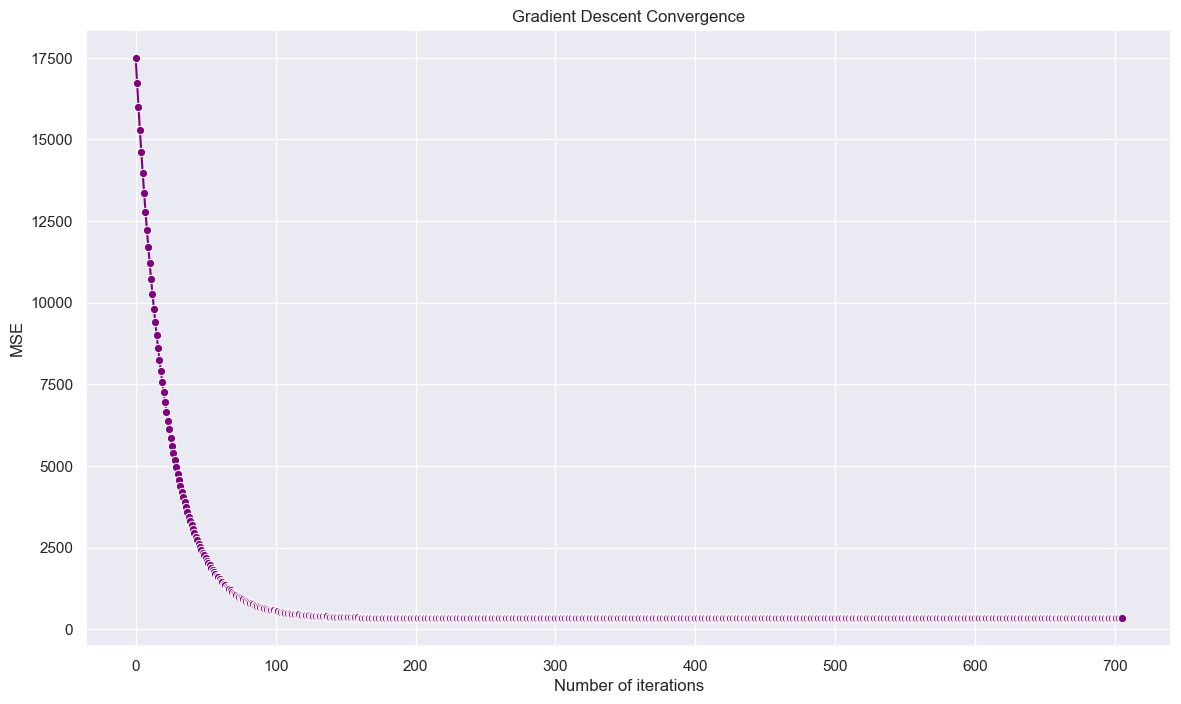

In [46]:
fig,ax = plt.subplots(figsize=(14,8))
sns.set(style='darkgrid', palette='muted')
sns.lineplot(x=range(len(model.error_list)),y=model.error_list, marker='o', color='purple')
ax.set_xlabel("Number of iterations")
ax.set_ylabel("MSE")
ax.set_title("Gradient Descent Convergence")
fig.savefig(f"GDConvergence.png", dpi=300, bbox_inches="tight")
plt.show()

### Gradient Descent Convergence Analysis

This plot shows the evolution of the cost function over the training
iterations.

A smooth and monotonic decrease in the loss indicates that the chosen
learning rate is appropriate and that the Gradient Descent algorithm
is converging properly.

## Synthetic Dataset Generation

A synthetic regression dataset is generated to evaluate the implementation.
Using synthetic data allows full control over the data distribution and
facilitates visual inspection of the learned model.

## Model Training and Comparison with 1 feature(2D graph)

The custom Linear Regression model is trained on the synthetic dataset
using Gradient Descent. After training, predictions are generated using
the learned parameters.

To validate the correctness of the custom implementation, a
`LinearRegression` model from Scikit-Learn is trained on the same dataset.

The predictions and learned regression plane are compared visually in a 2D graph

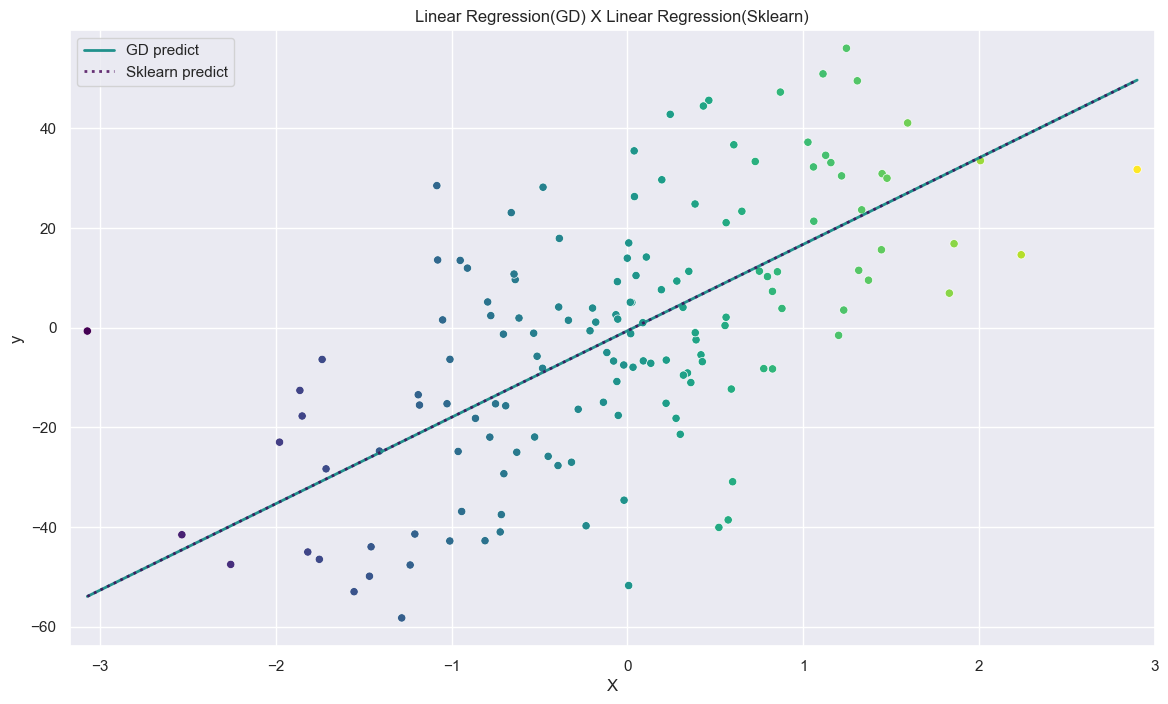

In [19]:
X,y =sklearn.datasets.make_regression(n_samples=150, n_features=1, noise=20, random_state=44)
model = LinearRegression_GD()
model.fit(X,y)
y_pred = model.predict(X)
model_sk = sklearn.linear_model.LinearRegression()
model_sk.fit(X,y)
y_pred_sk = model_sk.predict(X)
X_df= pd.DataFrame(X)
fig, ax = plt.subplots(figsize=(14,8))

sns.set(style='darkgrid')
sns.scatterplot(x=X.flatten(), y=y,hue=X.flatten(), palette='viridis',ax=ax,legend=False)
sns.lineplot(x=X.flatten(), y=y_pred, label="GD predict", color="#21918C",ax=ax,linewidth= 2)
sns.lineplot(x=X.flatten(), y=y_pred_sk, label="Sklearn predict", color="#440154", linestyle =':', alpha =0.8,ax=ax,linewidth=2  )
ax.set_xlim(X.min()-0.1, X.max()+0.1)  
ax.set_ylim(y_pred.min()-10, y_pred.max()+10) 

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Linear Regression(GD) X Linear Regression(Sklearn)")
fig.savefig(f"LinRegComparison.png", dpi=300, bbox_inches="tight")
plt.show()


### Conclusion (2D Visualization)

The 2D plot shows that the prediction lines produced by the custom
implementation and by Scikit-Learn's LinearRegression almost perfectly
overlap.

This visual overlap indicates that both models learned essentially the
same linear function, providing strong qualitative evidence of the
correctness of the from-scratch Gradient Descent implementation.


## 3D Visualization of the Learned Regression Plane

A 3D plot is used to visualize:

- The original data points
- The regression plane learned by the custom implementation
- The regression plane learned by Scikit-Learn


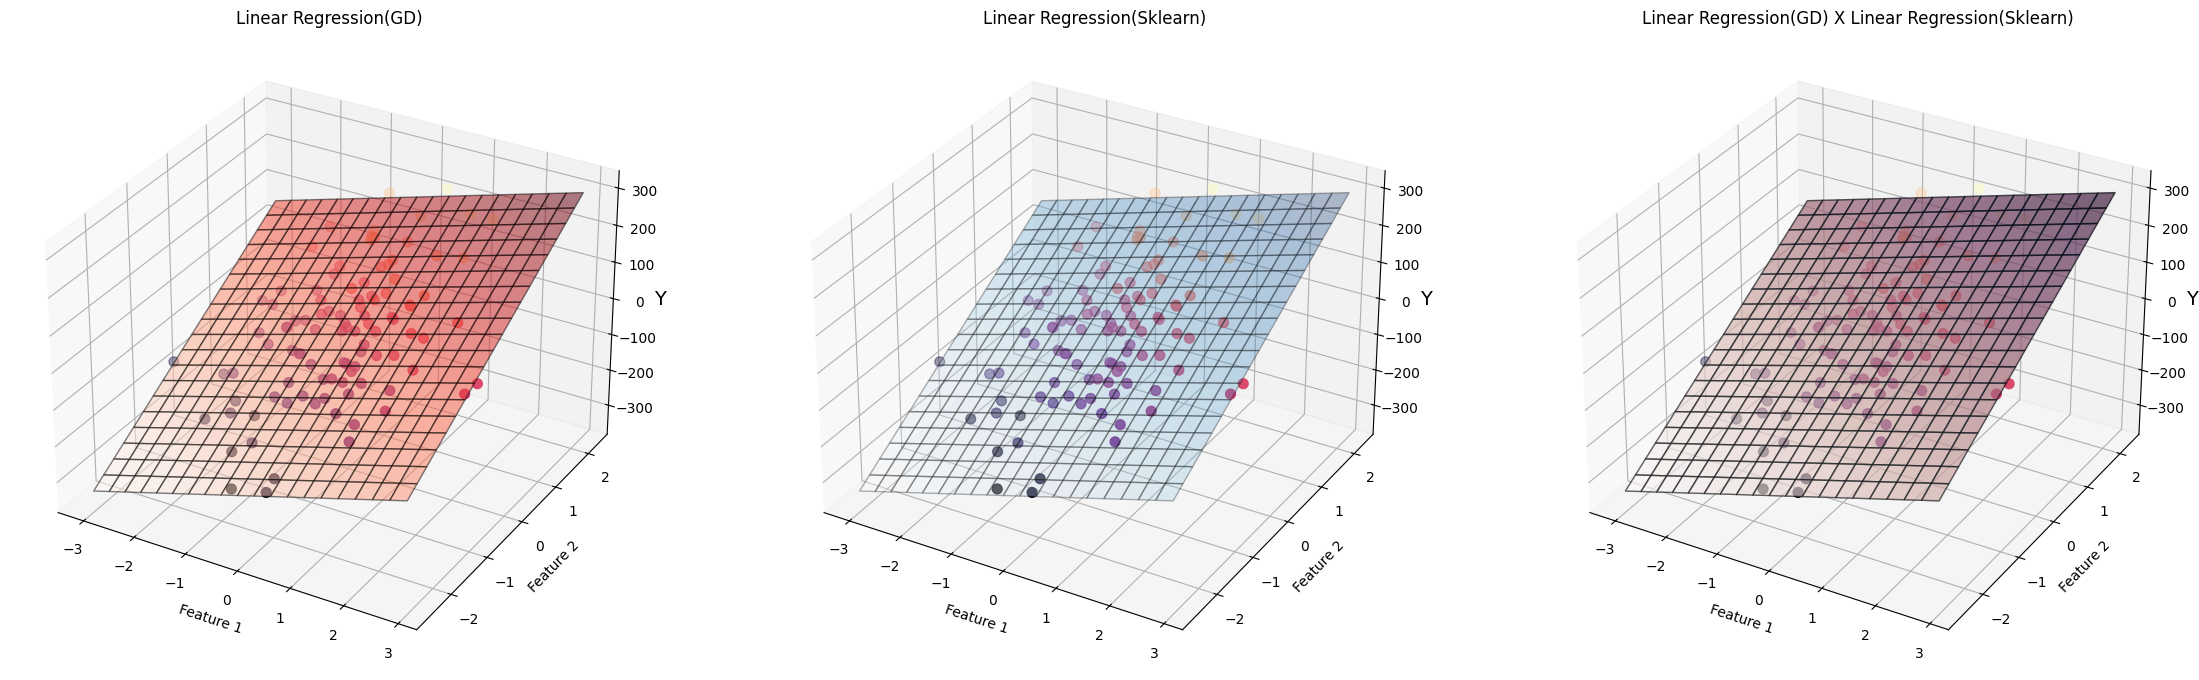

In [15]:
X,y =sklearn.datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=44)
model = LinearRegression_GD()
model.fit(X,y)
model_sk = sklearn.linear_model.LinearRegression()
model_sk.fit(X,y)

X=pd.DataFrame(X)
X1_grid, X2_grid = np.meshgrid(np.linspace(X.loc[:,0].min(), X.loc[:,0].max(), 20),
                               np.linspace(X.loc[:,1].min(), X.loc[:,1].max(), 20))
Z = model.predict(np.c_[X1_grid.ravel(), X2_grid.ravel()]).reshape(X1_grid.shape)
Z_sk= model_sk.predict(np.c_[X1_grid.ravel(), X2_grid.ravel()]).reshape(X1_grid.shape)

fig, ax = plt.subplots(1,3,figsize=(28,20), subplot_kw={'projection': '3d'})
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[0].set_zlabel("Y", fontsize=14, labelpad=0)
ax[0].set_title("Linear Regression(GD)")

ax[0].scatter(X.loc[:,0], X.loc[:,1], y, c=y, cmap='magma', s=50)
ax[0].plot_surface(X1_grid, X2_grid, Z, alpha=0.5, cmap='Reds', edgecolor='k')
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].set_zlabel("Y", fontsize=14, labelpad=0)
ax[1].set_title("Linear Regression(Sklearn)")

ax[1].scatter(X.loc[:,0], X.loc[:,1], y, c=y, cmap='magma', s=50)
ax[1].plot_surface(X1_grid, X2_grid, Z_sk, alpha=0.3, cmap='Blues', edgecolor='k')
ax[2].scatter(X.loc[:,0], X.loc[:,1], y, c=y, cmap='magma', s=50)
ax[2].plot_surface(X1_grid, X2_grid, Z_sk, alpha=0.3, cmap='Blues', edgecolor='k')
ax[2].plot_surface(X1_grid, X2_grid, Z, alpha=0.5, cmap='Reds', edgecolor='k')
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")
ax[2].set_zlabel("Y", fontsize=14, labelpad=0)
ax[2].set_title("Linear Regression(GD) X Linear Regression(Sklearn) ")
fig.savefig(f"LinearRegression3DComparison.png", dpi=300, bbox_inches="tight")
plt.show()

### Conclusion (3D Visualization)

The 3D visualization demonstrates that the regression plane learned
by the custom implementation nearly overlaps with the plane learned
by Scikit-Learn's LinearRegression.

This visual agreement provides strong qualitative evidence that the
from-scratch implementation converges to the same optimal solution
as the reference library model.


## Performance Evaluation

The performance of the custom implementation is evaluated using standard
regression metrics:

- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- R² Score

These metrics are compared against the Scikit-Learn model to quantitatively
verify the correctness of the implementation.

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
Df_errors = pd.DataFrame({'Features':[],'MSE_GD':[],"MSE_SK":[],"MAE_GD":[],"MAE_SK":[],"R2_GD":[],"R2_SK":[]})
Df_errors = Df_errors.set_index('Features')
for i in range(5):
    X,y =sklearn.datasets.make_regression(n_samples=150, n_features=i+1, noise=20, random_state=44)
    
    model = LinearRegression_GD()
    model.fit(X,y)
    y_pred = model.predict(X)
    
    model_sk = sklearn.linear_model.LinearRegression()
    model_sk.fit(X,y)
    y_pred_sk = model_sk.predict(X)
    mse = sklearn.metrics.mean_squared_error(y,y_pred)
    mae = sklearn.metrics.mean_absolute_error(y,y_pred)
    r2 = sklearn.metrics.r2_score(y,y_pred)
    
    mse_sk = sklearn.metrics.mean_squared_error(y,y_pred_sk)
    mae_sk = sklearn.metrics.mean_absolute_error(y,y_pred_sk)
    r2_sk = sklearn.metrics.r2_score(y,y_pred_sk)
    
    Df_errors.loc[i+1]=[mse,mse_sk,mae,mae_sk,r2,r2_sk]
Df_errors

,MSE_GD,MSE_SK,MAE_GD,MAE_SK,R2_GD,R2_SK
Features,,,,,,
1,447.320654,447.320654,17.100259,17.100292,0.413075,0.413075
2,365.574641,365.574640,15.390449,15.390392,0.937756,0.937756
3,390.240544,390.240544,15.449256,15.449212,0.979663,0.979663
4,397.900126,397.900125,15.801159,15.801160,0.959370,0.959370
5,339.640855,339.640855,14.587913,14.587950,0.981164,0.981164


### Final Conclusion

The quantitative comparison of evaluation metrics confirms the visual
observations.

The differences between the errors produced by the custom implementation
and Scikit-Learn's model are consistently on the order of $10^{-4}$ or
smaller, indicating numerical equivalence up to floating-point precision.

These results validate the correctness, stability, and reliability of
the Gradient Descent implementation.
